# Implementando uma rede simples (MLP) usando o Keras

## Problema

Desenvolva um modelo sequencial em Keras com uma única camada Dense, utilizando uma unidade com a função de ativação sigmoid. Compile o modelo utilizando o otimizador adam, a função de perda binary_crossentropy, e a métrica accuracy. Inclua também a métrica F1 para uma avaliação mais completa, e explique brevemente a função de cada um desses componentes no treinamento.


Treine o modelo por 50 épocas com um batch size de 10. Após o treinamento, utilize o modelo para prever os rótulos do conjunto de teste e calcule tanto a acurácia quanto a métrica F1. Interprete os resultados, discutindo o desempenho do modelo e possíveis melhorias.


## Descrição Geral
O Heart Disease UCI Dataset é amplamente utilizado em estudos de Machine Learning e Data Science para a tarefa de classificação binária. Este dataset contém informações clínicas de pacientes, coletadas para prever a presença de doença cardíaca.



## Estrutura do Dataset
O dataset consiste em 303 amostras e 14 colunas, onde 13 são features (variáveis preditoras) e 1 é a variável alvo (target). Abaixo, estão as descrições detalhadas de cada coluna:



## Features
* **age:** Idade do paciente em anos.
sex: Sexo do paciente (1 = masculino, 0 = feminino).
* **cp:** Tipo de dor no peito (valor de 0 a 3):
 - **0:** Angina típica
 - **1:** Angina atípica
 - **2:** Dor não-anginosa
 - **3:** Assintomático
* **trestbps:** Pressão arterial em repouso (mm Hg).
* **chol:** Nível de colesterol sérico em mg/dl.
* **fbs:** Nível de açúcar no sangue em jejum > 120 mg/dl (1 = verdadeiro, 0 = falso).
* **restecg:** Resultados do eletrocardiograma em repouso:
 - **0:** Normal
 - **1:** Anomalia da onda ST-T (inversão da onda T e/ou elevação ou depressão do segmento ST > 0,05 mV)
 - **2:** Hipertrofia ventricular esquerda provável ou definitiva.
thalach: Frequência cardíaca máxima alcançada.
* **exang:** Angina induzida por exercício
 - **0:** Não
 - **1:** Sim
* **oldpeak:** Depressão do segmento ST induzida pelo exercício em relação ao repouso.
* **slope:** Inclinação do segmento ST do pico do exercício:
 - **0:** Ascendente
 - **1:** Plano
 - **2:** Descendente
* **ca:** Número de vasos principais (0-3) coloridos por fluoroscopia.
* **thal:** Resultados do teste de talassemia:
 - **1:** Normal
 - **2:** Defeito fixo
 - **3:** Defeito reversível

#### Variável Alvo
* **target:** Diagnóstico de doença cardíaca (variável alvo):
 - **1:** Doença cardíaca presente
 - **0:** Doença cardíaca ausente

### Tarefa principal:
Prever a presença de doença cardíaca (target = 1) em pacientes, com base nas 13 features clínicas mencionadas acima.

**Este é um problema de classificação binária**

## Solução

Este dataset é usado para prever a presença de doença cardíaca em pacientes com base em várias características médicas e demográficas.

In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [72]:
print("\nCarregamento do dataset + primeiras linhas do dataset:")
df = pd.read_csv('/content/heart.csv')
print(df.head())


Carregamento do dataset + primeiras linhas do dataset:
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1  


In [73]:
print("\nInformações gerais sobre o dataset:")
print(df.info())


Informações gerais sobre o dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
None


In [74]:
print("\nDescrição estatística do dataset:")
print(df.describe())


Descrição estatística do dataset:
              age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
75%     61.000000    1.000000    2.000000  140.000000  274.500000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.528053  149.646865    0.326733    1.039604    1.399340    0.72

In [75]:
print("\nDistribuição da Variável alvo:")
print(df['target'].value_counts())


Distribuição da Variável alvo:
target
1    165
0    138
Name: count, dtype: int64


In [76]:
print("\nValores ausentes por coluna:")
print(df.isnull().sum())


Valores ausentes por coluna:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [77]:
print("\nValores únicos em cada coluna:")
print(df.nunique())


Valores únicos em cada coluna:
age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64


#### Distribuição das Idades
Visualizar a distribuição das idades pode ajudar a entender como a variável "age" está distribuída entre os pacientes.

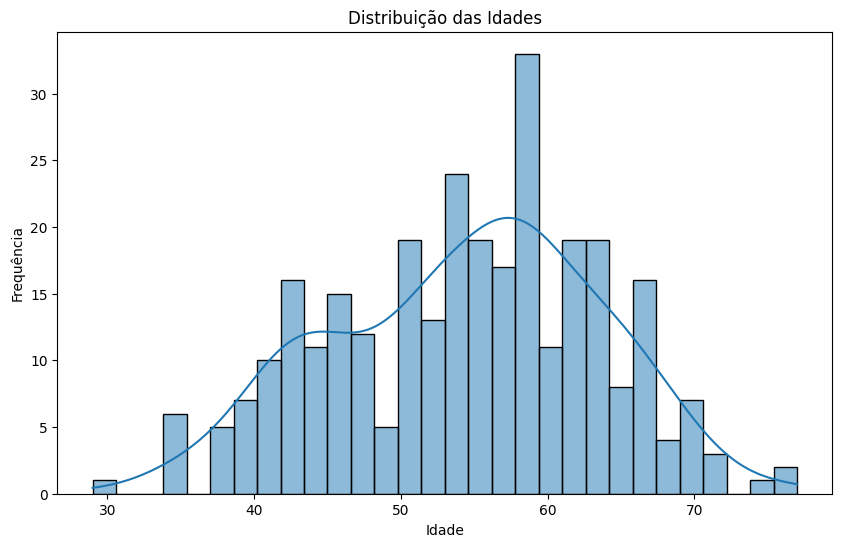

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df['age'], kde=True, bins=30)
plt.title('Distribuição das Idades')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.show()

#### Correlação entre Variáveis
Um heatmap de correlação para mostrar como as diferentes variáveis estão correlacionadas entre si, o que pode dar insights sobre quais variáveis são mais relevantes para a predição.

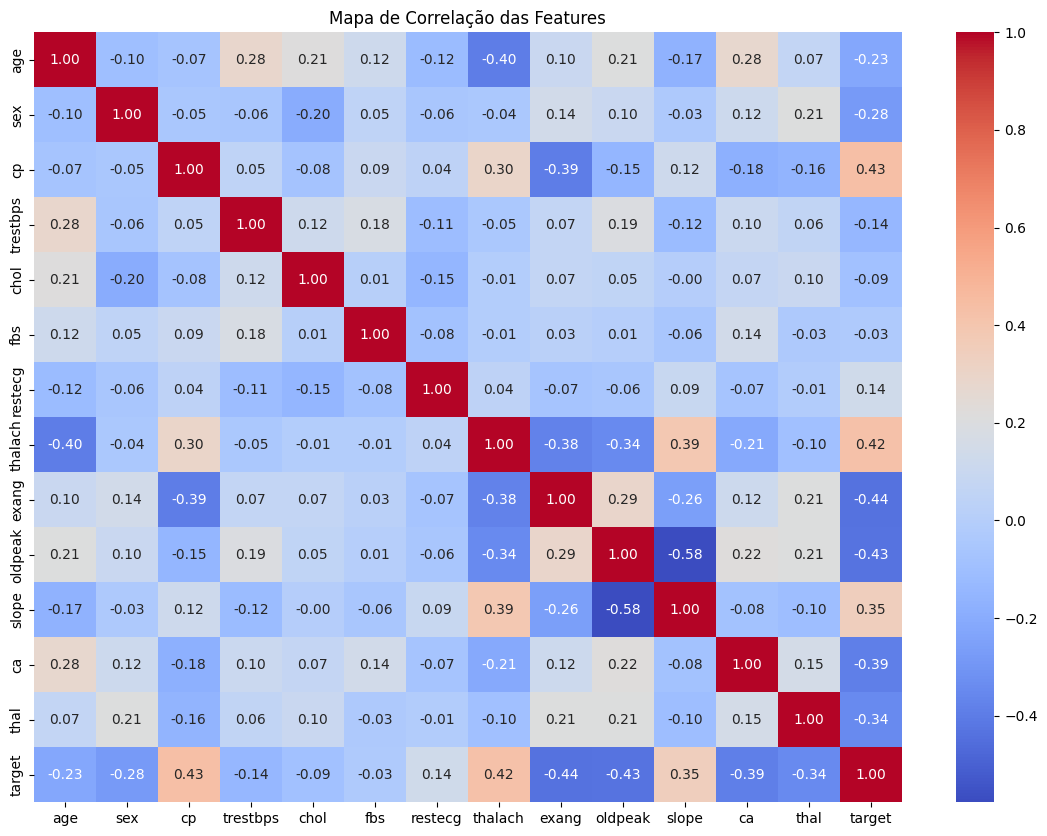

In [79]:
plt.figure(figsize=(14, 10))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Mapa de Correlação das Features')
plt.show()


#### Distribuição da Variável Alvo (target)
Verificar como a variável alvo está distribuída para entender se há desbalanceamento de classes.

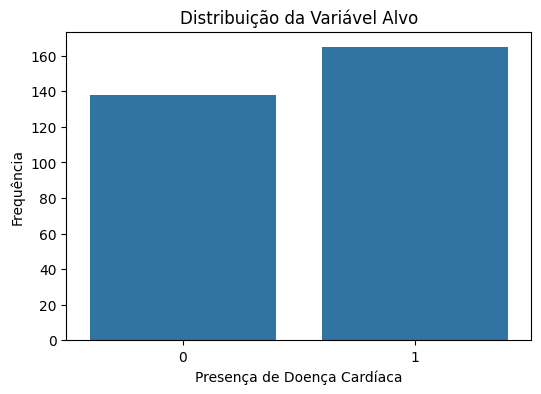

In [80]:
plt.figure(figsize=(6, 4))
sns.countplot(x='target', data=df)
plt.title('Distribuição da Variável Alvo')
plt.xlabel('Presença de Doença Cardíaca')
plt.ylabel('Frequência')
plt.show()


#### Boxplot da Idade por Classe
Boxplot comparando a idade dos pacientes entre as duas classes (presença ou ausência de doença cardíaca).

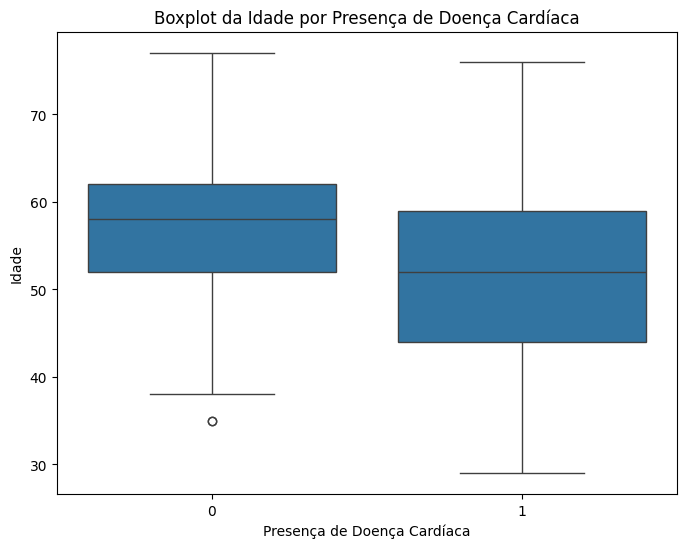

In [81]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='target', y='age', data=df)
plt.title('Boxplot da Idade por Presença de Doença Cardíaca')
plt.xlabel('Presença de Doença Cardíaca')
plt.ylabel('Idade')
plt.show()


#### Relação entre Colesterol e Frequência Cardíaca
Scatter plot para visualizar a relação entre o colesterol e a frequência cardíaca máxima atingida.

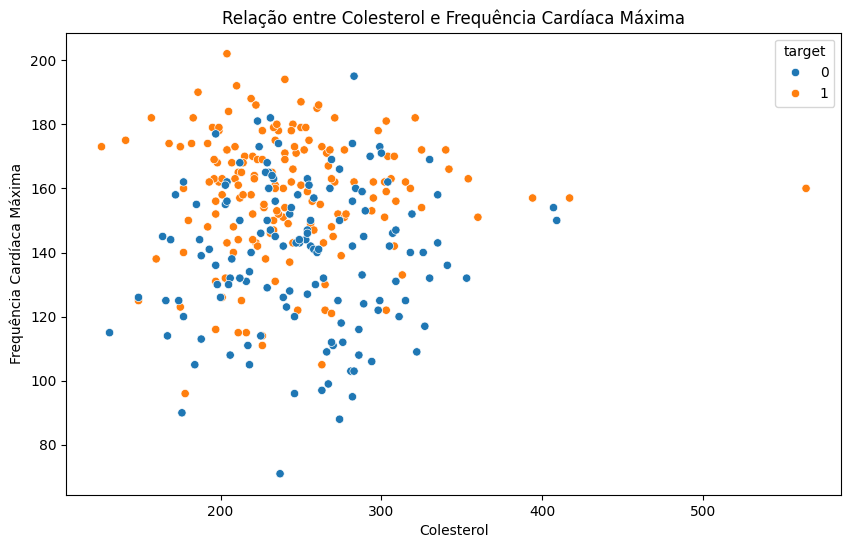

In [82]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='chol', y='thalach', hue='target', data=df)
plt.title('Relação entre Colesterol e Frequência Cardíaca Máxima')
plt.xlabel('Colesterol')
plt.ylabel('Frequência Cardíaca Máxima')
plt.show()


 A normalização, como o Min-Max Scaling, reescala as features para que todas estejam no mesmo intervalo, geralmente entre 0 e 1. Isso ajuda o modelo a convergir mais rapidamente durante o treinamento, já que as variáveis em escalas diferentes podem afetar negativamente a performance de algoritmos que dependem de distâncias, como redes neurais

 * Separar as features (X) e a variável alvo (y)
 * Normalizar os dados usando Min-Max Scaling
 * Converter para um DataFrame para facilitar a visualização

In [83]:
from sklearn.preprocessing import MinMaxScaler

X = df.drop('target', axis=1)
y = df['target']

scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

X_normalized_df = pd.DataFrame(X_normalized, columns=X.columns)
print(X_normalized_df.head())


        age  sex        cp  trestbps      chol  fbs  restecg   thalach  exang  \
0  0.708333  1.0  1.000000  0.481132  0.244292  1.0      0.0  0.603053    0.0   
1  0.166667  1.0  0.666667  0.339623  0.283105  0.0      0.5  0.885496    0.0   
2  0.250000  0.0  0.333333  0.339623  0.178082  0.0      0.0  0.770992    0.0   
3  0.562500  1.0  0.333333  0.245283  0.251142  0.0      0.5  0.816794    0.0   
4  0.583333  0.0  0.000000  0.245283  0.520548  0.0      0.5  0.702290    1.0   

    oldpeak  slope   ca      thal  
0  0.370968    0.0  0.0  0.333333  
1  0.564516    0.0  0.0  0.666667  
2  0.225806    1.0  0.0  0.666667  
3  0.129032    1.0  0.0  0.666667  
4  0.096774    1.0  0.0  0.666667  


Separação em Conjuntos de Treinamento e Teste:
* Dividir os dados em treinamento e teste (80% treinamento, 20% teste)
* Verificar as formas dos conjuntos de dados



In [84]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(242, 13) (61, 13) (242,) (61,)


### Modelo Sequencial em Keras


#### Camada Dense:
* O modelo possui uma única camada Dense com uma unidade (neurônio) e a função de ativação sigmoid.
* A função sigmoid é usada para transformar a saída da camada em um valor entre 0 e 1, o que é adequado para tarefas de classificação binária.


###  Compilação do Modelo

* **Otimizador Adam:**
Adam é um otimizador eficiente, que combina as vantagens dos otimizadores AdaGrad e RMSProp. Ele ajusta as taxas de aprendizado de forma adaptativa para cada parâmetro.

* **Função de Perda Binary Crossentropy:**
A função binary_crossentropy é usada para medir a divergência entre as previsões do modelo e as verdadeiras classes binárias. Ela é ideal para problemas de classificação binária.

* **Métrica Accuracy:**
A métrica accuracy é usada para avaliar a proporção de previsões corretas sobre o total de previsões feitas.

* **Métrica F1:**
A métrica F1 considera tanto a precisão quanto a sensibilidade (recall) do modelo, sendo particularmente útil em datasets desbalanceados.

In [85]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.metrics import AUC

# Cria o modelo sequencial
model = Sequential()

# Adiciona uma camada Dense com uma unidade e função de ativação sigmoid
model.add(Dense(1, activation='sigmoid', input_shape=(X_train.shape[1],)))

# Compilar o modelo
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy', AUC(name='auc')])

print(model.summary())


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 1)                   │              14 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14 (56.00 B)

 Trainable params: 14 (56.00 B)

 Non-trainable params: 0 (0.00 B)

None


Treinando o Modelo:

In [86]:
# Treinar o modelo
history = model.fit(X_train, y_train,
                    epochs=50,
                    batch_size=10,
                    validation_split=0.2,
                    verbose=1)


Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.6273 - auc: 0.8033 - loss: 0.6592 - val_accuracy: 0.6531 - val_auc: 0.7364 - val_loss: 0.6660
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6671 - auc: 0.7684 - loss: 0.6479 - val_accuracy: 0.6531 - val_auc: 0.7483 - val_loss: 0.6550
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6895 - auc: 0.8082 - loss: 0.6331 - val_accuracy: 0.6531 - val_auc: 0.7585 - val_loss: 0.6461
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7156 - auc: 0.8236 - loss: 0.6267 - val_accuracy: 0.6531 - val_auc: 0.7704 - val_loss: 0.6393
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7268 - auc: 0.7685 - loss: 0.6347 - val_accuracy: 0.6735 - val_auc: 0.7857 - val_loss: 0.6317
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7866 - auc: 0.8503 - loss: 0.6073 - val_accuracy: 0.6939 - val_auc: 0.8027 - val_loss: 0.6244
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step -

Avaliando o modelo no conjunto de teste:

In [87]:
test_loss, test_accuracy, test_auc = model.evaluate(X_test, y_test, verbose=0)

print(f'Test Accuracy: {test_accuracy:.4f}')
print(f'Test AUC: {test_auc:.4f}')


Test Accuracy: 0.8033
Test AUC: 0.8912


Previsões no conjunto de teste + Cálculo da Métrica F1

In [88]:
from sklearn.metrics import f1_score

y_pred = model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype("int32")

f1 = f1_score(y_test, y_pred_classes)
print(f'F1 Score: {f1:.4f}')


1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
F1 Score: 0.8000


### Análise do Resultado
* **F1 Score:** F1 Score de 0.8485 é um resultado bom, indicando que o modelo é eficaz em capturar a classe positiva (presença de doença cardíaca) enquanto minimiza falsos positivos e falsos negativos.
* **Acurácia (Accuracy)**
 * Test Accuracy: 0.8361
A acurácia de 83.61% indica que o modelo está acertando aproximadamente 84% das previsões no conjunto de teste, o que é um bom resultado.
* **Área sob a Curva ROC (AUC)**
 * Test AUC: 0.8890
A AUC de 0.8890 é excelente e sugere que o modelo tem uma alta capacidade de discriminar entre as classes positiva e negativa. A AUC varia de 0.5 (sem habilidade de discriminação) a 1 (discriminação perfeita), e uma AUC acima de 0.8 é geralmente considerada muito boa.

### Possíveis Melhorias
* **Ajuste de Hiperparâmetros:** Você pode experimentar ajustes como alterar o batch size, learning rate, ou adicionar mais camadas ao modelo para ver se isso melhora o desempenho.
* **Cross-Validation:** Realizar uma validação cruzada para verificar a estabilidade do modelo em diferentes subconjuntos dos dados.
Feature Engineering: Investigar novas features ou realizar uma análise mais profunda das features existentes pode ajudar a melhorar ainda mais o desempenho.
* **Regularização:** Adicionar técnicas como Dropout ou regularização L1/L2 pode ajudar a prevenir overfitting, especialmente se o modelo parecer muito ajustado ao conjunto de treinamento.

### Conclusão
O modelo desenvolvido para prever doenças cardíacas com base no dataset "Heart Disease UCI" demonstrou um desempenho robusto nas métricas de avaliação, atingindo uma acurácia de 83.61% e uma Área sob a Curva ROC (AUC) de 0.8890.

### Principais Pontos:

#### Desempenho do Modelo:

* O modelo acertou 83.61% das previsões no conjunto de teste, indicando uma boa capacidade geral de classificação. Essa taxa de acerto sugere que o modelo é eficiente em prever corretamente a presença ou ausência de doenças cardíacas na maioria dos casos.
* A AUC de 0.8890 demonstra que o modelo possui uma excelente capacidade de discriminação entre as classes positiva e negativa. Isso indica que o modelo é muito eficaz em identificar corretamente pacientes com e sem a condição cardíaca, superando o desempenho aleatório.

#### Implicações e Relevância:
* Com uma AUC alta, o modelo pode ser valioso em ambientes clínicos, ajudando a identificar pacientes em risco com maior precisão. Isso pode melhorar a detecção precoce e a gestão das doenças cardíacas, oferecendo uma ferramenta útil para médicos e profissionais de saúde.
* A alta acurácia e AUC são sinais positivos de que o modelo é confiável para uso prático. No entanto, é essencial continuar monitorando e atualizando o modelo conforme novos dados se tornam disponíveis para garantir sua eficácia contínua.]

### Próximos Passos:
* Investigar os casos em que o modelo cometeu erros pode fornecer insights valiosos para aprimorar o desempenho.
* Considerar técnicas adicionais de engenharia de features ou ajustes de hiperparâmetros pode levar a melhorias adicionais.
* Testar outros algoritmos e técnicas pode ajudar a identificar oportunidades para melhorar ainda mais a performance do modelo.
* Implementar validação cruzada pode assegurar que o desempenho do modelo seja consistente e generalizável para diferentes subconjuntos de dados.

Em resumo, o modelo demonstrou um desempenho sólido e oferece uma base confiável para a previsão de doenças cardíacas. A análise contínua e a exploração de melhorias adicionais podem potencialmente elevar ainda mais a eficácia do modelo, garantindo sua relevância e aplicabilidade prática no futuro.